## Model Evaluator Notebook

In [8]:
# NOTE: Ideally, we will replace this sys.path.append later
import sys
sys.path.append("../")
sys.path.append("../../")
sys.path.append("../../../")

from tasks.evaluate_model.src.model_evaluator import *
from tasks.data_loader.src.utils import *

### Import data

Assuming an input JSON file as the one specified in the Slack discussions (see templates in `/evaluate_model/input/data_template.json`), we can use import functions from `/data_loader/src/utils.py` to load the sentences and their labels (see specific notebook example to load data in `data_loader/notebooks/`). 

True labels should be loaded in `y_true` and the model predictions in `y_pred` (not an actual rule, just convention)

Label names are stored in a global variable called `LABEL_NAMES`. The string to numerical mapping would be:

- Direct payment (PES): 0
- Tax deduction: 1
- Credit/guarantee: 2
- Technical assistance: 3
- Supplies: 4 
- Fine: 5

In [12]:
dataset_fname = "../input/sample_dataset.json"
model_preds_fname = "../input/sample_model_output.json"

dataset = load_file(dataset_fname)
model_preds = load_file(model_preds_fname) 

y_true = labels_from_dataset(dataset)
y_pred = labels_from_model_output(model_preds)
y_true, y_pred

([1, 0, 2, 0, 1, 1, 3, 4], [1, 0, 1, 2, 1, 2, 3, 2])

For testing purposes, we will use random values as if we already had multiple data points from a data set, as well as predictions from our classifier.

In [18]:
y_true = np.random.randint(len(LABEL_NAMES), size=500)
y_pred = np.random.randint(len(LABEL_NAMES), size=500)

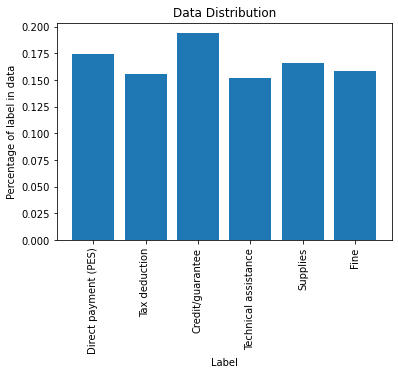

Label counts:
{'Direct payment (PES)': 0.174, 'Tax deduction': 0.156, 'Credit/guarantee': 0.194, 'Technical assistance': 0.152, 'Supplies': 0.166, 'Fine': 0.158}


In [19]:
plot_data_distribution(y_true, normalize=True)

### Using the evaluator

The model evaluator can be used to evaluate multiple models within one notebook, the only requirement is to have the true labels and the predicted labels. 

1. We only need to instantiate the evaluator once. If we want, we can feed the true labels `y_true` and predicted labels `y_pred` here, but if not, we can do it later as well.

In [20]:
evaluator = ModelEvaluator()

2. If we haven't given `y_true` and `y_pred` yet, we can either use `evaluator.update(y_true, y_pred)` and that will calculate basic metrics such as recall, precision or accuracy.

In [26]:
evaluator.update(y_true, y_pred)
print("Recall per class:", evaluator.recall)
print("Average weighted precision:", evaluator.avg_precision[1])

Recall per class: [0.11494253 0.19230769 0.15463918 0.13157895 0.19277108 0.17721519]
Average weighted precision: 0.16268154744129468


3. If we want a full evaluation cycle, we use the `evaluate()` method. It will make a call to `evaluator.update()` before running the metrics and plotting. 

The metrics supported are:
- Precision
- Recall (Sensitivity)
- Accuracy
- Specificity
- Confusion matrix
- Precision-Recall curve

_Note_: Since the cosine similarity is more related to the automatic labeling process that sBERT is involved in and not necessarily the classification process itself, I haven't included it here.

These are the parameters to the evaluate function:

- `plot_cm`: (boolean) Plot confusion matrix 
- `plot_prc`: (boolean) Plot precision-recall curve (averaged for all classes)
- `plot_prc_multi`: (boolean) Plot the multi-class version of the precision-recall curve (`plot_prc` MUST be `True` if this is set to `True`)
- `normalize`: (boolean) Normalize the confusion matrix content
- `store`: (boolean) Store the plots and the results dataframe. If this is set to `True`, then `exp_name` MUST have a value and it can't be None. The files will be stored in the `evaluate_model/output/` folder.
- `exp_name`: (str) The name of the model or the experiment, useful if we will want to store files (e.g `test_BETO_1`). 

Stored confusion matrix: ../output/test_run_cm.png


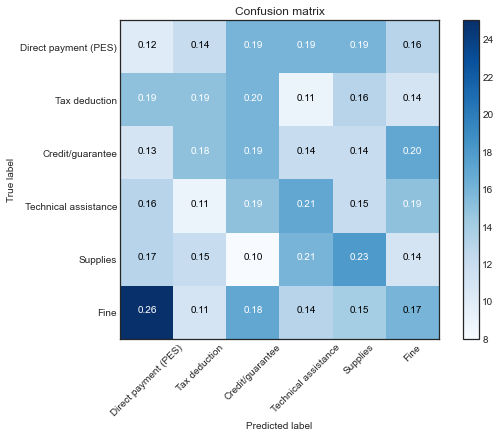

Stored Precision-Recall Curve: ../output/test_run_prc.png


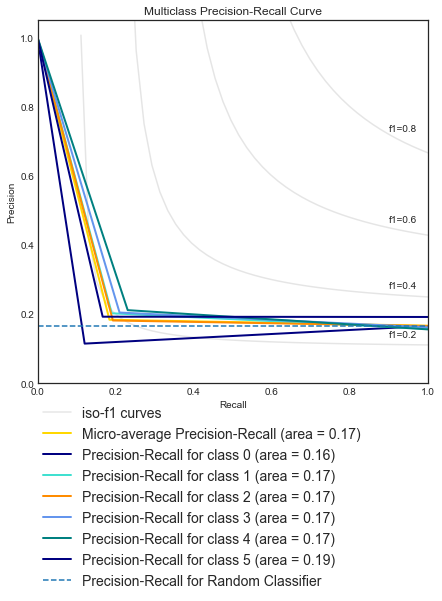

Stored results: ../output/test_run_results.csv


,Precision,Recall (Sensitivity),True negative rate (Specificity),F1-score
Direct payment (PES),0.11,0.12,0.82,0.12
Tax deduction,0.2,0.19,0.86,0.2
Credit/guarantee,0.18,0.19,0.83,0.19
Technical assistance,0.2,0.21,0.84,0.21
Supplies,0.21,0.23,0.84,0.22
Fine,0.19,0.17,0.83,0.18
-----,-----,-----,-----,-----
Macro avg,0.18,0.19,0.84,0.18
Weighted avg,0.18,0.18,0.84,0.18
Accuracy,-----,-----,-----,0.184


In [107]:
evaluator.evaluate(y_true, y_pred, 
                   plot_cm=True, plot_prc=True, plot_prc_multi=True, normalize=True, 
                   store=True, exp_name="test_run")